# 1. Labor: Többváltozós lineáris regresszió

A gyakorlat során a többváltozós lineáris regresszió problémáját fogjuk megoldani, azonban ezt az általában használt legkissebb négyzetek módszere helyett a gépi tanulásban gyakran használt gradiens módszerrel fogjuk megtenni.

### Ingatlanárak:

A feladatban ingatlanok értékének becslésére fogunk többváltozós lineáris regressziót alkalmazni.

Tegyük fel, hogy egy bank szeretné a lakáshitelezési folyamatban automatizálni az ingatlanok értékbecslését, így csökkentve az értékbecslők alkalmazásából származó költségeket. Egy lehetséges alternatíva, hogy az ingatlan paraméterei alapján kerül az ingatlan piaci ára megbecslésre, amelyhez szükségünk van egy a kettő közötti kapcsolatot leíró modellre. Adataink az ingatlan területe ($ft^2$) és a hálószobák száma (db), illetve az értékesítéskor meghatározott ár ($) lesz.

### Lineáris regresszió

Lineáris regresszió esetében a kimeneti/becsült/magyarázott változónkat a  bemeneti/magyarázó változóink lineáris kombinációjaként modellezzük. Egyváltozós esetben ez az alábbi alakban írható fel:

$$ \hat{y}(x) = w_0 + w_1 x $$

ahol <br>
- $\hat{y}$ - a magyarázott $y$ változó becslése <br>
- $w$ - súlyok (weights) <br>
- $x$ - a bemeneti/magyarázó változó <br>

Látható, hogy az alábbi alakban felírt összefüggés megfeleltethető a síkban leírt egyenes egyenletével ($y=c + m \cdot x$), ahol $c$ esetünkben $w_0$, az egyenes $Y$ tengellyel vett metszéspontja, $m$ pedig esetünkben $w_1$, az egyenes meredeksége.

Többváltozós esetben a magyarázott változónk több bemenetei változó lineáris kombinációjaként áll elő:

$$ \hat{y}(\mathbf{x}) = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n = w_0 + \sum_{i=1}^{n} w_i x_i = w_0 + \mathbf{w} \cdot \mathbf{x}; \qquad \mathbf{w} = \left[ w_1, w_2, \ldots w_n \right], \quad \mathbf{x} = \left[ x_1, x_2, \ldots x_n \right],$$

Amennyiben a bemeneti változó vektorunkat kiegészítjük az $x_0 = 1$ elemmel, a fenti kifejezés kompakatabb formában írható:

$$ \hat{y}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x}; \qquad \mathbf{w} = \left[ w_0, w_1, w_2, \ldots w_n \right], \quad \mathbf{x} = \left[ 1, x_1, x_2, \ldots x_n \right],$$

A bemeneti vektorok kiegészítése egy egyessel később a neurális hálózatoknál is meg fog jelenni a *bias* változó képében.

#### Regresszió számítása

Ha az $m$ darab, egyenként $n$ darab bemeneti adatpontunkat tartalmazó vektort egy $m \times (n+1)$ mátrixba szervezhetjük az alábbi alakban:

$$
\mathbf{X} = \left[
	\begin{array}{ccccc}
 		1 & x^1_1 & x^1_2 & \ldots & x^1_n\\
		1 & x^2_1 & x^2_2 & \ldots & x^2_n\\
 		\vdots & \vdots & \vdots & \ddots & \vdots\\
        1 & x^m_1 & x^m_2 & \ldots & x^m_n\\
	\end{array}	\right]
$$

A súlyokat tartalmazó $\textbf{w}$ vektort értelmezhetjük egy $(n+1) \times 1$-es mátrixként:

$$
\mathbf{W} = \left[
	\begin{array}{c}
 		w_0\\
		w_1\\
 		\vdots\\
        w_n\\
	\end{array}\right]
$$

Az $m$ darab magyarázott változó becslését ekkor egy darab mátrixszorzással megkaphatjuk:

$$
\mathbf{\hat{Y}} =
\left[
	\begin{array}{c}
 		\hat{y}^1\\
		\hat{y}^2\\
 		\vdots\\
        \hat{y}^m\\
	\end{array}
\right] =
\left[
	\begin{array}{c}
 		w_0 + w_1 x^1_1 + w_2 x^1_1 + \ldots + w_n x^1_1\\
		w_0 + w_1 x^2_1 + w_2 x^2_2 + \ldots + w_n x^2_n\\
 		\vdots\\
        w_0 + w_1 x^m_1 + w_2 x^m_2 + \ldots + w_n x^m_n\\
	\end{array}
\right] =
\left[
	\begin{array}{ccccc}
 		1 & x^1_1 & x^1_2 & \ldots & x^1_n\\
		1 & x^2_1 & x^2_2 & \ldots & x^2_n\\
 		\vdots & \vdots & \vdots & \ddots & \vdots\\
        1 & x^m_1 & x^m_2 & \ldots & x^m_n\\
	\end{array}
\right]
\cdot
 \left[
	\begin{array}{c}
 		w_0\\
		w_1\\
 		\vdots\\
        w_n\\
	\end{array}
\right]=
\mathbf{X} \cdot \mathbf{W}
$$

Ezzel az összes becslés számítása egy műveletben elvégezhető, amely számításilag sokkal hatékonyabb az egyes becsléseket egyenként kiszámítani.

### Költségfüggvény

A modellünk jóságának vizsgálatához definiálnuni kell egy költségfüggvényt. Ez fogja számszerűsíteni, hogy modellünk becslése mennyire írja le jól magyarázott változó viselkedését. Ennek szokásos formája a reziduumok (becsült-valós) négyzetösszege:
$$ C = \sum_{j=1}^{m} (r^j)^2 = \sum_{j=1}^{m} (\hat{y}^j - y^j)^2 $$

Adott bemenetek és kimenetek esetén a költségfüggvény értéke a meghatározott súlyoktól függ:
$$ C(\mathbf{w}) = \sum_{j=1}^{m} ( w_0 + w_1 x^j_1 + w_2 x^j_2 + ... + w_n x^j_n - y^j)^2 $$

A fenti mátrixos alakokat felhasználva ez az alábbi művelettel az összes bementei mintára egyszerűen számítható:
$$ C(\mathbf{W}) = \sum(\mathbf{\hat{Y}}-\mathbf{Y})^2 = (\mathbf{\hat{Y}}-\mathbf{Y})^T \cdot (\mathbf{\hat{Y}}-\mathbf{Y}) = (\mathbf{X} \cdot \mathbf{W} - \mathbf{Y})^T \cdot (\mathbf{X} \cdot \mathbf{W} - \mathbf{Y})$$

#### Legkisebb négyzetek módszere

Tegyük fel, hogy a költségfüggvényünket egy adott bemeneti adatsor és adott súlyok mellett kiszámoljuk, majd egyetlen egy súlyt ($w_p$) elkezdünk változtatni minden más paraméter fixen tartása mellett. Ekkor a költségfüggvény az adott paraméter függvényében a következőként alakul:

$$ C(w_p) = a w_p^2 + b w_p + c $$
ahol $a$, $b$ és $c$ értéke konstansnak tekinthető, illetve $a$ értéke minden esetben pozitív. Ez az egyenlet egy parabolát ír le, amelynek egyetlen darab lokális minimuma van. A lokális minimum helyét ott találjuk, ahol a költségfüggvény $w_p$ szerinti deriváltja 0.

<!---
<center><img src="img/parabole.svg" width="350"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=1QH6YZaM-zBMwWzN_mGdS1ilHOYfAeDtR" width="350"></center>

A lineáris regresszió analitikus megoldását a legkisebb négyzetek módszerével számoljuk. Kiszámítjuk a költségfüggvény paraméterenkénti parciális deriváltják, majd az ezeket nullával egyenlővé téve kapott egyenletrendszer megoldásaként megkapjuk $\mathbf{W}$ azon értékeit, amelyere $C(\mathbf{W})$ értéke minimális (ez az egyenletrendszer csak akkor lesz lineárisan független, ha legalább $n+1$ darab lineárisan független mintával rendelkezünk). 

### Gradiens módszer (Gradient Descent)

A gép tanulás területén azonban gyakran előfordul, hogy a modellben szereplő paraméterek (súlyok) száma jóval meghaladja a rendelkezésre álló adatpontok számát. Ekkor a legkisebb négyzetek módszerével kapott egyenletrendszernek nem lesz egyértelmű megoldása, így más, numerikus módon kell a költségfüggvény minimumát megtalálnunk. A használt költésgfüggvény az eddig látotthoz nagyon hasonló. Az általában használt Mean Squared Error (MSE) költségfüggvény a reziduumok négyzetösszegétől csak skálázásban tér el, ami
- a parciális deriválás során egyszerűbb alakot eredményez (1/2-ed),
- függetleníti a felhasznált adatpontok számától (1/m):

$$C_{MSE} = \frac{1}{2m}\sum_{j=1}^{m}(\hat{y}^j-y^j)^2$$

A gradiens módszer egy iteratív módszer, amely során minden iterációban kiszámítjuk a költségfüggvény aktuális súlyok szerinti gradiensét (minden súly szerint vett parciális deriváltját). Mivel az eredeti függvény jellege másodrendű, az adott pontban vett parciális deriváltak lineárisak lesznek, értékük pedig a költségfüggvény adott pontban vett meredekségét mutatja meg. E meredekség alapján megállapíthatjuk, hogy a súlyt milyen irányba ( pozitív meredekség esetén csökkentenünk, negatív meredekség esetén növelnünk), és mekkora lépésben érdemes módosítani (a minimumnál a meredekség nulla, ahogy távolodunk tőle egyre nő). Nem érdemes rögtön a parciális deriváltat nullával egyenlővé tennünk, mivel ahogy egy súlyt módosítunk, a többi súlyra vonatkozó parciális derivált értéke is változik, így a már "beállított" súlyok "elromlanak".

<!---
<center><img src="img/gradient.svg" width="350"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=1eh8HnMQiAvhG1mK599aElvr0ec93c9fU" width="350"></center>

A teljes gradiensvektor megadja a költségfüggvény meredekségét az adott pontban az összes súlyra nézve, azaz a súlyok alkotta tér felletti  felület "érintőjének" meredekségét és irányát (a súlyvektor milyen irányú módosítása adja a legnagyobb változást a költségfüggvényben, és mekkora ez a változás a jelenlegi pont közvetlen környezetében). A súlyokat ezen gradiennsvektorral ellentétes irányban, annak nagyságának függvényében érdemes módosítani ahhoz, hogy a feltehető minimum irányába mozduljunk el. A módosítás nagyságát szabályozó paramétert tanulási rátának nevezzük, értéke 0 és 1 közötti, jelölése általában $\mu$.

A fentiek alapján tehát a súlyok módosítása a következő összefüggés alapján történik:

$$\mathbf{W} = \mathbf{W} - \mu \nabla C (\mathbf{W})$$

ahol

$$\nabla C (\mathbf{W}) = 
\left[
	\begin{array}{c}
 		\frac{\delta C(\mathbf{W})}{\delta w_0}\\
		\frac{\delta C(\mathbf{W})}{\delta w_1}\\
        \frac{\delta C(\mathbf{W})}{\delta w_2}\\
 		\vdots\\
        \frac{\delta C(\mathbf{W})}{\delta w_n}\\
	\end{array}\right]
$$

Egy adott parciális derivált számítása az $(f \circ g)' = (f' \circ g) \cdot g'$ deriválálsi azonosság alapján:

$$
\frac{\delta C(\mathbf{W})}{\delta w_i} = \frac{\delta \frac{1}{2m}\sum_{j=1}^{m} (w_0 + w_1 x^j_1 + w_2 x^j_2 + ... + w_n x^j_n - y^j)^2}{{\delta w_i}} =
\frac{1}{m}\sum_{j=1}^{m} ((w_0 + w_1 x^j_1 + w_2 x^j_2 + ... + w_n x^j_n - y^j) \cdot x_i^j) $$

A már korábban bevezetett mátrixok segítségével a gradiensvektor számítása:
$$ 
\nabla C (\mathbf{W}) = 
\left[
	\begin{array}{c}
 		\frac{\delta C(\mathbf{W})}{\delta w_0}\\
		\frac{\delta C(\mathbf{W})}{\delta w_1}\\
        \frac{\delta C(\mathbf{W})}{\delta w_2}\\
 		\vdots\\
        \frac{\delta C(\mathbf{W})}{\delta w_n}\\
	\end{array}\right] 
= \frac{1}{m}\mathbf{X}^T \cdot (\mathbf{X} \cdot \mathbf{W} - \mathbf{Y})
$$

A gradiens módszer implementálásánál figyelnünk kell arra, hogy először a teljes gradiensvektort kiszámítsuk, majd utána az összes súlyt egyszerre frissítsük!

## 00: Könyvtár importálások

Első lépésként importáljuk a feladat megoldása során használt könyvtárakat. Esetünkben ezek a következők lesznek:
- Numpy a matematikai műveletek elvégzéséhez
- Pandas az adatok beolvasásához és kezeléséhez
- MatPlotLib.pyplot az eredményeink ábrázolásához
- Plotly Express interaktív vizualizációhoz

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Használjuk ezeket sötét téma esetén
plt.style.use('dark_background')
styleTemplate = 'plotly_dark'

# Használjuk ezeket világos téma esetén
#plt.style.use('default')
#styleTemplate = 'plotly_white'

## 01: Adatbeolvasás
Olvassuk be a szükséges adatokat a ''housingData.txt'' fájlból.

In [37]:
df = pd.read_csv('housingData.txt', sep = ',', header=0)    # Olvassuk be az adatokat egy Pandas DataFrame ojektumba
df.head(10)                                                 # Irassuk ki az első 10 sort, hogy ellenőrizzük sikerült-e a beolvasás

,Area,Rooms,Value
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## 02: Adatfelfedezés

Új adathalmazzal történő első interrakció során érdemes azt először megvizsgálni, alapvető vizualizációkat ábrázolni, hogy legyen egy elsődleges "benyomás" az adatok jellegéről. Ábrázoljuk az adatokat egy X-Y diagrammon.

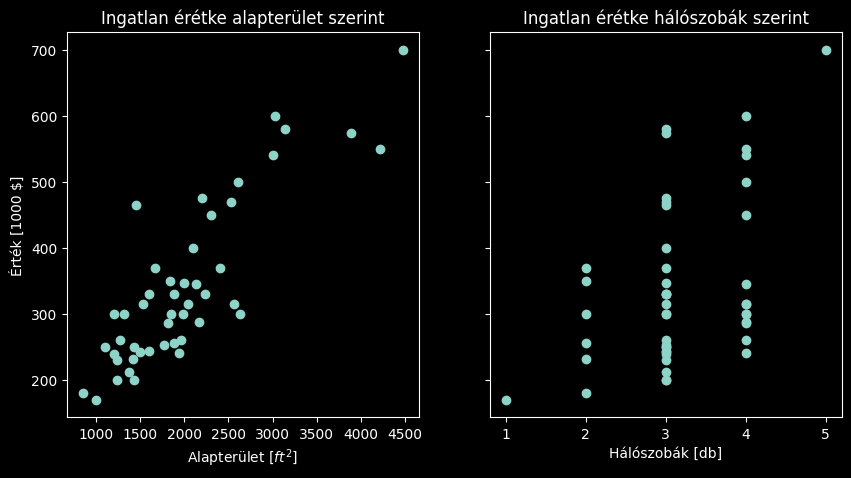

In [38]:
# Formális vizualizáció MatPlotLib-el
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 5), sharey=True)

ax0.scatter(df['Area'],df['Value']/1000)

ax0.set_title("Ingatlan érétke alapterület szerint")
ax0.set_xlabel("Alapterület [$ft^2$]")
ax0.set_ylabel("Érték [1000 $]")

ax1.scatter(df['Rooms'],df['Value']/1000)

ax1.set_title("Ingatlan érétke hálószobák szerint")
ax1.set_xlabel("Hálószobák [db]")

plt.show()

In [39]:
# Interaktív vizualizáció Plotlyval
# Note: 3D tengelyek nem támogatják a tengelyfeliratok LaTeX-el való renderelését
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df["Area"], y=df["Rooms"], z=df["Value"], mode= "markers"))
fig.update_layout(
    title = "Ingatlanok értéke az alapterület és szobák függvényében",
    scene = dict(
        xaxis_title = "Alapterület [sqft]",
        yaxis_title = "Hálószobák száma [db]",
        zaxis_title = "Ingatlan értéke [$]"),
    template=styleTemplate,
    width=750,
    height=500,
)

fig.show()

## 03: Adatok előkészítése

A következő lépés az adatok esetleges előfeldolgozása és a modellillesztés elvégzéshez szükséges változók (mátrixok) létrehozása. 

In [40]:
X = df[['Area', 'Rooms']].to_numpy() # Bemeneti változók oszlopainak kiemelése és tömmbé konvertálása
Y = df[['Value']].to_numpy() # Kimeneti változó oszlopának kiemelése és tömmbé konvertálása

m = X.shape[0]
print('X:',X.shape)                                            # adattömbök méretének / adatok számának kiírása
print('Y:',Y.shape)
print('Adatok száma',m)

X: (47, 2)
Y: (47, 1)
Adatok száma 47


Jelen esetben némely változó nagyságrendje elég nagy. Minél nagyobb nagyságrendbe esnek az adatpontjaink, várhatóan annál távolabb esnek a súlyaink kezdeti értékei az optimálistól. Ebben az esetben a számított gradiens által előírt súlyváltoztatás jelentős léptékű lehet, gyakran előfordul hogy konvergálás helyett a modell instabillá válik, a súlyok a végtelenségig nőnek abszolút értékben. Ezt megelőzhetjük, ha a paramétereinket a 0 körüli tartományra transzformáljuk. Így az adatok jól kondícionáltak lesznek és szinte garantálható a modell konvergenciája. Ezt nevezzük az adatok standardizálásának, amelyet a következő módon végezhetünk el:

$$z^j_{st} = \frac{z^j-\bar{z}}{\sigma_z}$$

ahol $z$ egy tetszőleges változó.

**Feladat:** Végezze el az X és Y változóinak normalizálását!

In [41]:
def featureNormalize(Z):
######################################################    
    
    mean = np.mean(Z, axis = 0 )
    sigma = np.std(Z, axis = 0, ddof = 1 )
    Z_norm = (Z - mean)/sigma

######################################################
    return Z_norm, mean, sigma                            # képlet alapján eredmény visszaadása

print('Normalizing data ... \n')                    
X,Xmean,Xsigma = featureNormalize(X)                  # X standardizálása
print('Magyarázó változók átlaga:', Xmean)
print('Magyarázó változók szórása:', Xsigma, '\n')
Y,Ymean,Ysigma = featureNormalize(Y)                  # Y standardizálása
print('Magyarázott változó átlaga:', Ymean)
print('Magyarázott változó szórása:', Ysigma)

Normalizing data ... 

Magyarázó változók átlaga: [2000.68085106    3.17021277]
Magyarázó változók szórása: [7.94702354e+02 7.60981887e-01] 

Magyarázott változó átlaga: [340412.65957447]
Magyarázott változó szórása: [125039.8995864]


A kiszámolt átlag és szórás értékeket meg kell őriznünk azért, hogy később a modellünk valós bemeneti értkekkel valós kimeneti árat tudjunk becsülni. A könnyebb kezelhetőség érdekében ezt érdemes dictionary változóba rendeznünk.

In [42]:
scaleFactors = {"Xmean" : Xmean, "Xsigma" : Xsigma, "Ymean" : Ymean, "Ysigma" : Ysigma}

Ellenőrizzuk a normalizálás sikerességét az új változók átlagának és szórásának kiszámításával!

In [43]:
print('Standardizált magyarázó változók átlaga:', np.mean(X,0))
print('Standardizált magyarázó változók változók szórása:', np.std(X,0), '\n')
print('Standardizált magyarázott változó átlaga:', np.mean(Y,0))
print('Standardizált magyarázott változó szórása:', np.std(Y,0))

Standardizált magyarázó változók átlaga: [3.77948264e-17 2.74603035e-16]
Standardizált magyarázó változók változók szórása: [0.98930451 0.98930451] 

Standardizált magyarázott változó átlaga: [-9.68492426e-17]
Standardizált magyarázott változó szórása: [0.98930451]


Amennyiben az átlagokra 0 közeli értéket, a szórásokra pedig 1 közelit kaptunk, a standardizálás sikeres volt.

**Feladat:** Készítse elő a súlyokat tartalmazó $\mathbf{W}$ mátrixot, és egészítse ki az $\mathbf{X}$ mátrixot a bias változóval!

In [44]:
# W inicializálása, X bővítése
######################################################

X = np.column_stack([np.ones([X.shape[0],1]),X])
W = np.zeros((X.shape[1],1))

######################################################

In [45]:
if (W.shape != (3,1)) or (np.sum(W) != 0):
    print('A W mátrix nem megfelelő, ellenőrizze!')
elif (X.shape[1] != 3):
    print('Az X mátrix mérete nem megfelelő, ellenőrizze!')
elif (np.sum(X, 0)[0] != 47):
    print('Az X mátrix bias változóval való kiegészítése nem megfelelő, ellenőrizze!')
else:
    print('X:',X.shape)                                            # adattömbök méretének / adatok számának kiírása
    print('W:',W)

X: (47, 3)
W: [[0.]
 [0.]
 [0.]]


## 04: Modell implementálása

Az adatok előkészítése utáni következő lépés a modell és tanítási logika definiálása.

**Feladat:** Készítse el az MSE költségfüggvényt számító függvényt!

In [46]:
# Költségfüggvény
def costMSE(X,Y,W):
#############################################     
   m = X.shape[0]
   residuum = X@W - Y # A @ a mátrixszorzás
   C=1/(2*m)*(residuum.T @ residuum)

############################################# 
   return C

In [47]:
C1=costMSE(X,Y,np.array([[0],[0],[0]]))
print('''Teszt (Cost function):
\tSúlyok: W = [0;0;0]
\tElvárt érték (közelítve) = 0.5
\tSzámolt érték = ''',C1)
C2=costMSE(X,Y,np.array([[-1],[2],[-3]]))
print('''\n\tSúlyok: W = [-1;2;-3]
\tElvárt érték (közelítve) = 3.76
\tSzámolt érték = ''',C2)

if C1 == 0.5 and int(C2) == 3:
    print("\n A costMSE függvény megfelelő!")
else:
    print("\n A costMSE függvény megfelelő, korrekció szükséges!")

Teszt (Cost function):
	Súlyok: W = [0;0;0]
	Elvárt érték (közelítve) = 0.5
	Számolt érték =  [[0.4893617]]

	Súlyok: W = [-1;2;-3]
	Elvárt érték (közelítve) = 3.76
	Számolt érték =  [[3.68770696]]

 A costMSE függvény megfelelő, korrekció szükséges!


**Feladat:** Készítse el többváltozós lineáris regresszió problémájat gradiens módszerrel megoldó algoritmust! Az algoritmus számolja ki a kezdeti, majd minden iteráció utáni költségfüggvény értéket is!

In [48]:
def gradientDescent(X, Y, W, learning_rate, epochs):
    m = Y.size
    C_history = np.zeros(epochs+1)
    C_history[0] = costMSE(X,Y,W)
######################################################
    for i in range(epochs):
        W = W - learning_rate * 1/m * X.T @ (X @ W - Y)
        C_history[i+1] = costMSE(X,Y,W)
######################################################
    return W,C_history

## 05: Modell tanítás

Futtassuk le a gradiens algoritmust és ellenőrizzük a kapott eredményeket!

In [49]:
print('Gradiens algoritmus futtatása ...')
lr = 0.015                                                 # tanulási ráta
epochs = 1000                                              # epoch szám
W=np.zeros([3,1])                                          # kezdeti súly (0;0;0)
W,C_history= gradientDescent(X,Y,W,lr,epochs)              # Gradiens módszer használata
print('''A Gradiens algoritmustól elvárt súlyok (nagyjából):
[[-8.32732321e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]]
''')
print('A Gradiens algoritmus által számított súlyok:\n', W)

Gradiens algoritmus futtatása ...
A Gadiens algoritmustól elvárt súlyok (nagyjából):
[[-8.32732321e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]]

A Gadiens algoritmusáltal számított súlyok:
 [[-1.11232367e-16]
 [ 8.84047401e-01]
 [-5.24602327e-02]]


C:\Users\nyuli\AppData\Local\Temp\ipykernel_15780\2931512903.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\nyuli\AppData\Local\Temp\ipykernel_15780\2931512903.py:8: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



## 06: Modell értékelése

Ellenőrizzük a modell konvergenciáját az epochok alatti költségfüggvény értékének ábrázolásával!

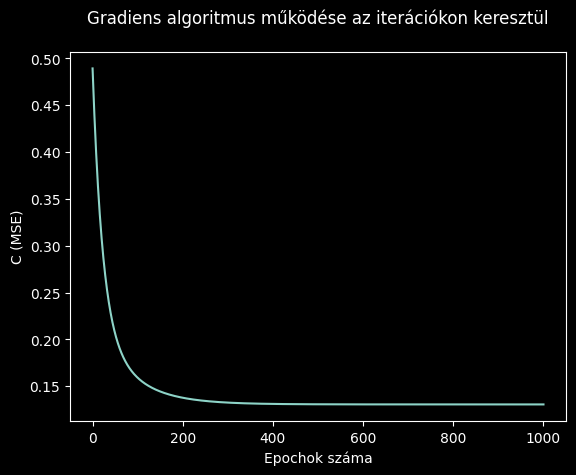

In [50]:
plt.plot(C_history)                                                                 # C_history kirajzolása
plt.title("Gradiens algoritmus működése az iterációkon keresztül",pad= 20)
plt.xlabel("Epochok száma")
plt.ylabel("C (MSE)")
plt.show()

A szemléltetés érdekében érdemes megvizsgálni a költségfüggvény alakját egy nagyobb intervallumon. Ehhez hozzunk létre egy-egy vektort a $w_1$ és $w_2$ súlyoknak ($w_0$ vegyük fixnek a gradiens módszerrel meghatározott értéken) és minden értékpárra számoljuk ki a költségfüggvény értékét. Így kaphatunk egy képet, milyen felületen kerestük az optimumot és hol találtuk azt meg.

In [51]:
# Bementei tartomány definiálása
w1 = np.linspace(-2,4,100)
w2 = np.linspace(-3,3,100)
C = np.zeros((w1.size,w2.size))

# Költségfüggvény számítáas a bemeneti tartomány felett
for i in range(w1.size):
    for j in range(w2.size):
        t=np.array([W[0,0],w1[i],w2[j]]).reshape(3,1)
        C[[i],[j]]= costMSE(X,Y,t)

# Ábrázolás Plotly-val
fig = go.Figure()

# A magyarázott változónkat tartalmazó tömböt transzponálnunk kell,
# mivel mátrixok jelőlésénél az első dimenzió (x) a sort jelenti (függőleges irány)
# azonban ábrázolásnál az első koordináta (x tengely) a vízszintes irányhoz tatozik.
fig.add_trace(go.Surface(x=w1, y=w2, z=C.T))

#Plot formázása
fig.update_layout(
    title = "Költségfüggvény felület a w1  és w2 súlyok felett",
    scene = dict(
        xaxis_title = 'w1',
        yaxis_title = "w2",
        zaxis_title = "C (MSE)"),
    template=styleTemplate,
    width=500,
    height=750)

# Megjelenítés
fig.show()

In [52]:
# Kontúrplot ábrázolása Plotlyval
fig = go.Figure()
fig.add_trace(go.Contour(x=w1, y=w2, z=C.T, contours=dict(showlabels = True, labelfont = dict(size = 12, color = 'white')))) 
fig.add_trace(go.Scatter(x=W[1], y=W[2]))

#Plot formázása
fig.update_layout(
    title = "Költségfüggvény kontúrok a w1  és w2 súlyok felett", 
    xaxis_title = "w1",
    yaxis_title = "w2",
    template=styleTemplate,
    width=750,
    height=750)

# Megjelenítés
fig.show()

## 07: Becslés

**Feladat:** Becsüljük meg egy 1650 $ft^2$-es, 3 hálószobás ingatlan árát! Figyeljünk, hogy az adatok normalizálását itt is végezzük el.

In [55]:
## BEFEJEZETLEN

def predict(FEET, BED, W = W, scaleFactors = scaleFactors):
#############################################
    stdIN = np.column_stack((np.ones((1, 1 )),(FEET-scaleFactors[Xmean])/scaleFactors[Xsigma],(BED-scaleFactors[Ymean])/scaleFactors[Ysigma]))
    value = (stdIN@W*scaleFactors[Ysigma]+scaleFactors[Ymean])
############################################# 
    return value

In [56]:
FEET = 1650
BED = 3
value = predict(FEET, BED)
print('Értékbecslés egy 1650 sq-ft / 3 hálószobás ingatlanra: $%.2f' % value)
print('(a becsült értéknek körülbelül $293000-nak kell lennie)')

TypeError: unhashable type: 'numpy.ndarray'

A becslés általános vizsgálatához ábrázoljuk és vizsgáljuk meg a bemenetei adatainkra illesztett regressziós felületet!

In [ ]:
# A bementek tartományát határozzuk meg az eredeti adataink alapján
x = np.linspace(np.min(df["Area"]),np.max(df["Area"]),100)          
y = np.linspace(np.min(df["Rooms"]),np.max(df["Rooms"]),100)
z = np.zeros((x.size,y.size))

# A becsült ingatlanárakat határozzuk meg a már előkészített predict függvénnyel
for i in range(x.size):
    for j in range(y.size):
        z[[i],[j]]= predict(x[i], y[j])

# Ábrázolás Plotly-val
fig = go.Figure()

# A magyarázott változót az előzőhöz hasonlóan transzponálni kell.
fig.add_trace(go.Scatter3d(x=df["Area"], y=df["Rooms"], z=df["Value"], mode= "markers"))
fig.add_trace(go.Surface(x=x, y=y, z=z.T))

#Plot formázása
fig.update_layout(
    title = "Ingatlanok értéke az alapterület és szobák föggvényében",
    scene = dict(
        xaxis_title = "Alapterület [sqft]",
        yaxis_title = "Hálószobák száma [db]",
        zaxis_title = "Ingatlan értéke [$]"),
    template=styleTemplate,
    width=750,
    height=500,
)

#Plot megjelenítése
fig.show()

Érdemes megfigyleni, hogy a hálószobák számához tartozó súly negatív, azaz a modellünk alapján minél kevesebb a hálószobák száma, ugyan csekély mértékben, de annál többet ér az ingatlan. Ez a kapott lineárisan illesztett felületen is megifigyelhető. Érdemes lehet statisztikai tesszttel ellnőrizni, hogy a $w_0$ és $w_2$ súlyok szignifikánsan különböznek-e a 0-tól, azaz van-e egy ingatlannak "alapértéke" illetve függ-e ténylegesen a hálószobák számától (ez jelen laborgyakorlatnak nem része). Amennyiben egy ilyen teszt eredményeként azt kapjuk, hogy ezek statisztikailakg szignifikáns módon nem különböznek 0-tól, érdemes az adott bemeneti változót magyarázó változóként kezelni (hálószobák száma függ az alapterülettől), de önmagában a hálószobák száma nem szabja meg az ingat árátl.

## XX: Megoldás a Scikit-learn könyvtár segítségével

A feladatnak egy fokkal szebb megoldása lenne, ha a külön-külön definiált függvények és változók helyett definiálnánk egy osztályt, amelynek saját változói és metódusai tartalmaznák a szükséges adatokat (pl. `scaleFactors` vagy `W`) és metódusokat (pl. `costMSE`, `predict`). A Scikit-learn nevú könyvtár pontosan ilyen felépítéssel implementálja a lineáris regressziö modeljét.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('housingData.txt', sep = ',', header=0)                # adatok beolvasása
X = df[['Area', 'Rooms']].to_numpy()                                    # X rendezése
Y = df[['Value']].to_numpy()                                            # Y rendezése

lin_reg = LinearRegression()                                            # lineáris regressziós modell osztály példányosítása
lin_reg.fit(X,Y)                                                        # modell illesztése X,Y alapján

pred = lin_reg.predict([[1650,3]])                                      # predikció 1650 nm és 3 szobás lakásra
print('Értékbecslés egy 1650 sq-ft / 3 hálószobás ingatlanra: $%.2f' % pred)